### Libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

### Data Loading

In [13]:
df = pd.read_csv('historical_data.csv')

### Feature Selection

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)
X = df[['date_ordinal']]
y = df['close_price']

### Train-test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Prediction vs Actual

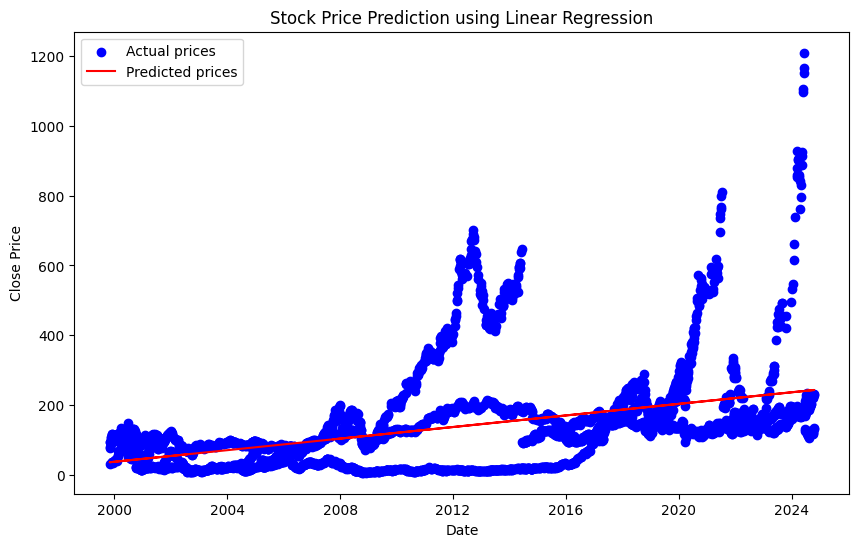

In [16]:
plt.figure(figsize=(10, 6))
X_test['date_ordinal'] = X_test['date_ordinal'].map(pd.Timestamp.fromordinal)
X_train['date_ordinal'] = X_train['date_ordinal'].map(pd.Timestamp.fromordinal)
plt.scatter(X_test, y_test, color='blue', label='Actual prices')
plt.plot(X_test, y_pred, color='red', label='Predicted prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()

### Predicting 30 days ahead

In [17]:
future_days = 30
last_date_ordinal = df['date_ordinal'].max()
future_dates = np.array(
    [last_date_ordinal + i for i in range(1, future_days + 1)]).reshape(-1, 1)
future_predictions = model.predict(future_dates)

for i, pred in enumerate(future_predictions):
    print(f"Day {i + 1}: Predicted close price: {pred:.2f}")

Day 1: Predicted close price: 243.45
Day 2: Predicted close price: 243.47
Day 3: Predicted close price: 243.50
Day 4: Predicted close price: 243.52
Day 5: Predicted close price: 243.54
Day 6: Predicted close price: 243.57
Day 7: Predicted close price: 243.59
Day 8: Predicted close price: 243.61
Day 9: Predicted close price: 243.63
Day 10: Predicted close price: 243.66
Day 11: Predicted close price: 243.68
Day 12: Predicted close price: 243.70
Day 13: Predicted close price: 243.72
Day 14: Predicted close price: 243.75
Day 15: Predicted close price: 243.77
Day 16: Predicted close price: 243.79
Day 17: Predicted close price: 243.82
Day 18: Predicted close price: 243.84
Day 19: Predicted close price: 243.86
Day 20: Predicted close price: 243.88
Day 21: Predicted close price: 243.91
Day 22: Predicted close price: 243.93
Day 23: Predicted close price: 243.95
Day 24: Predicted close price: 243.97
Day 25: Predicted close price: 244.00
Day 26: Predicted close price: 244.02
Day 27: Predicted clo

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
joblib.dump(model, 'stock_price_prediction_model.pkl')

model = joblib.load('stock_price_prediction_model.pkl')
future_predictions = model.predict(future_dates)

for i, pred in enumerate(future_predictions):
    print(f"Day {i + 1}: Predicted close price: {pred:.2f}")


Day 1: Predicted close price: 243.45
Day 2: Predicted close price: 243.47
Day 3: Predicted close price: 243.50
Day 4: Predicted close price: 243.52
Day 5: Predicted close price: 243.54
Day 6: Predicted close price: 243.57
Day 7: Predicted close price: 243.59
Day 8: Predicted close price: 243.61
Day 9: Predicted close price: 243.63
Day 10: Predicted close price: 243.66
Day 11: Predicted close price: 243.68
Day 12: Predicted close price: 243.70
Day 13: Predicted close price: 243.72
Day 14: Predicted close price: 243.75
Day 15: Predicted close price: 243.77
Day 16: Predicted close price: 243.79
Day 17: Predicted close price: 243.82
Day 18: Predicted close price: 243.84
Day 19: Predicted close price: 243.86
Day 20: Predicted close price: 243.88
Day 21: Predicted close price: 243.91
Day 22: Predicted close price: 243.93
Day 23: Predicted close price: 243.95
Day 24: Predicted close price: 243.97
Day 25: Predicted close price: 244.00
Day 26: Predicted close price: 244.02
Day 27: Predicted clo

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
